In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [35]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [36]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


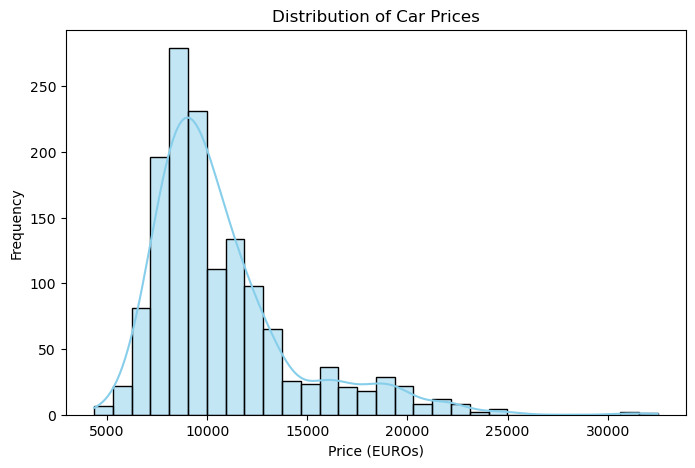

In [37]:
# Visualize Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (EUROs)')
plt.ylabel('Frequency')
plt.show()

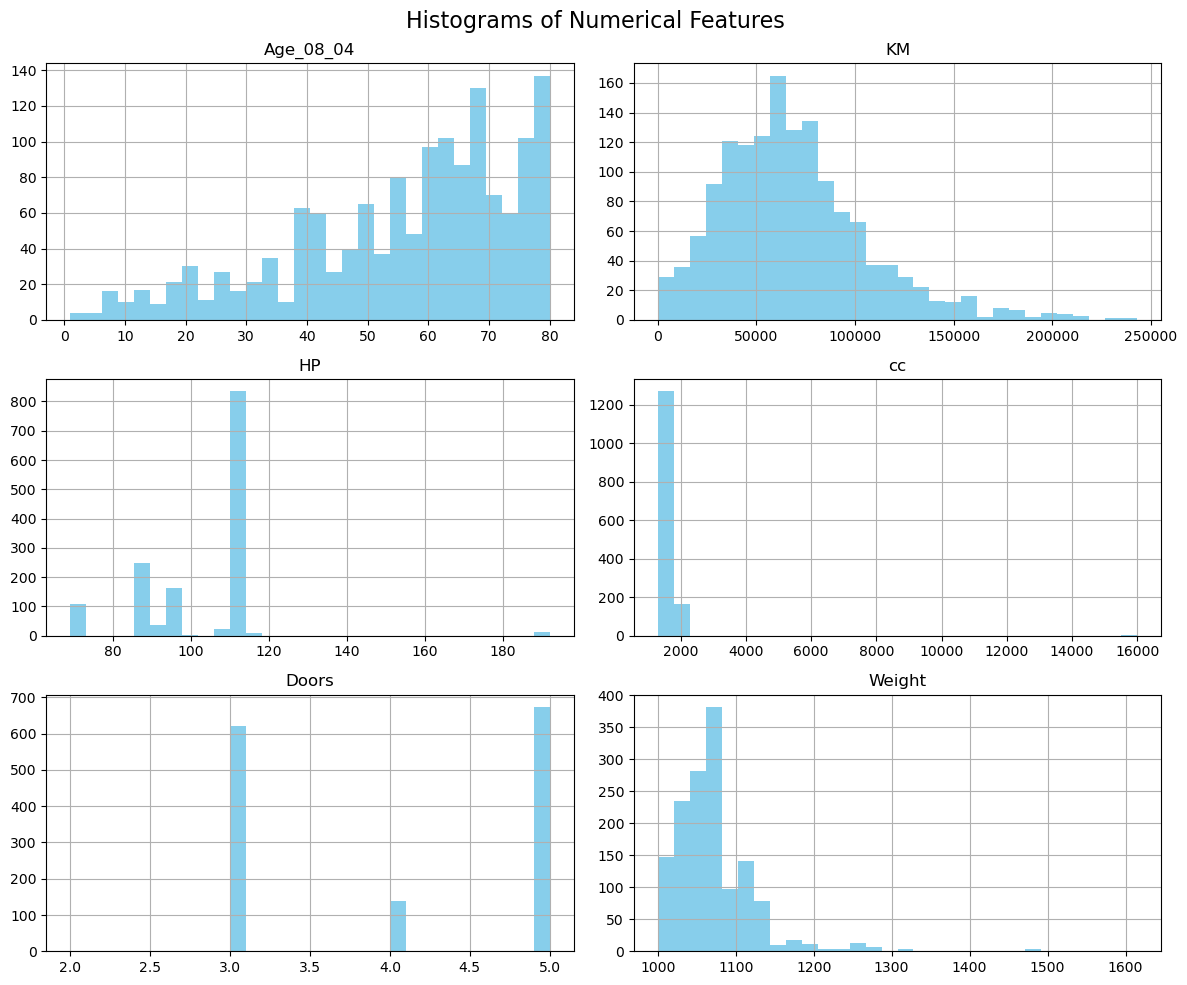

In [38]:
# Visualize numerical features
num_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
df[num_cols].hist(bins=30, figsize=(12, 10), color='skyblue')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

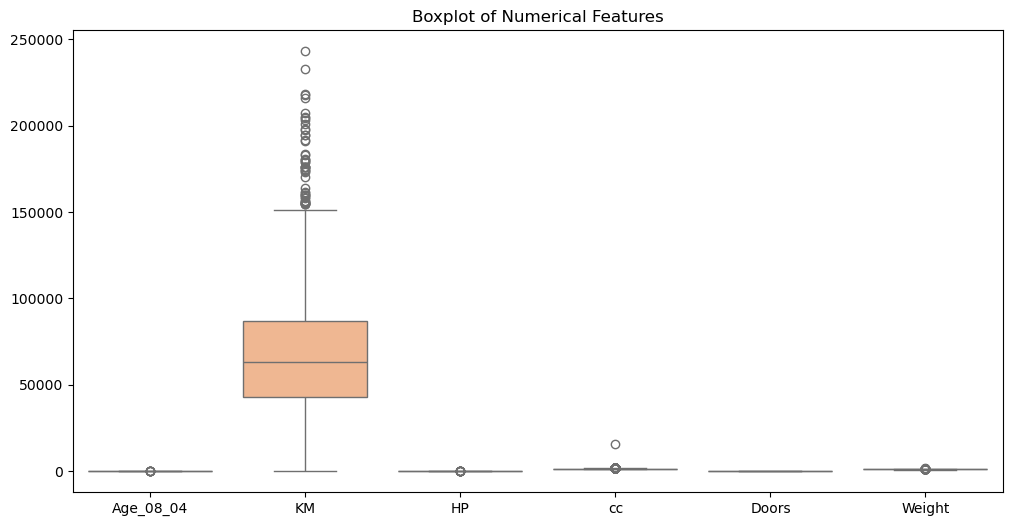

In [39]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], palette='pastel')
plt.title('Boxplot of Numerical Features')
plt.show()

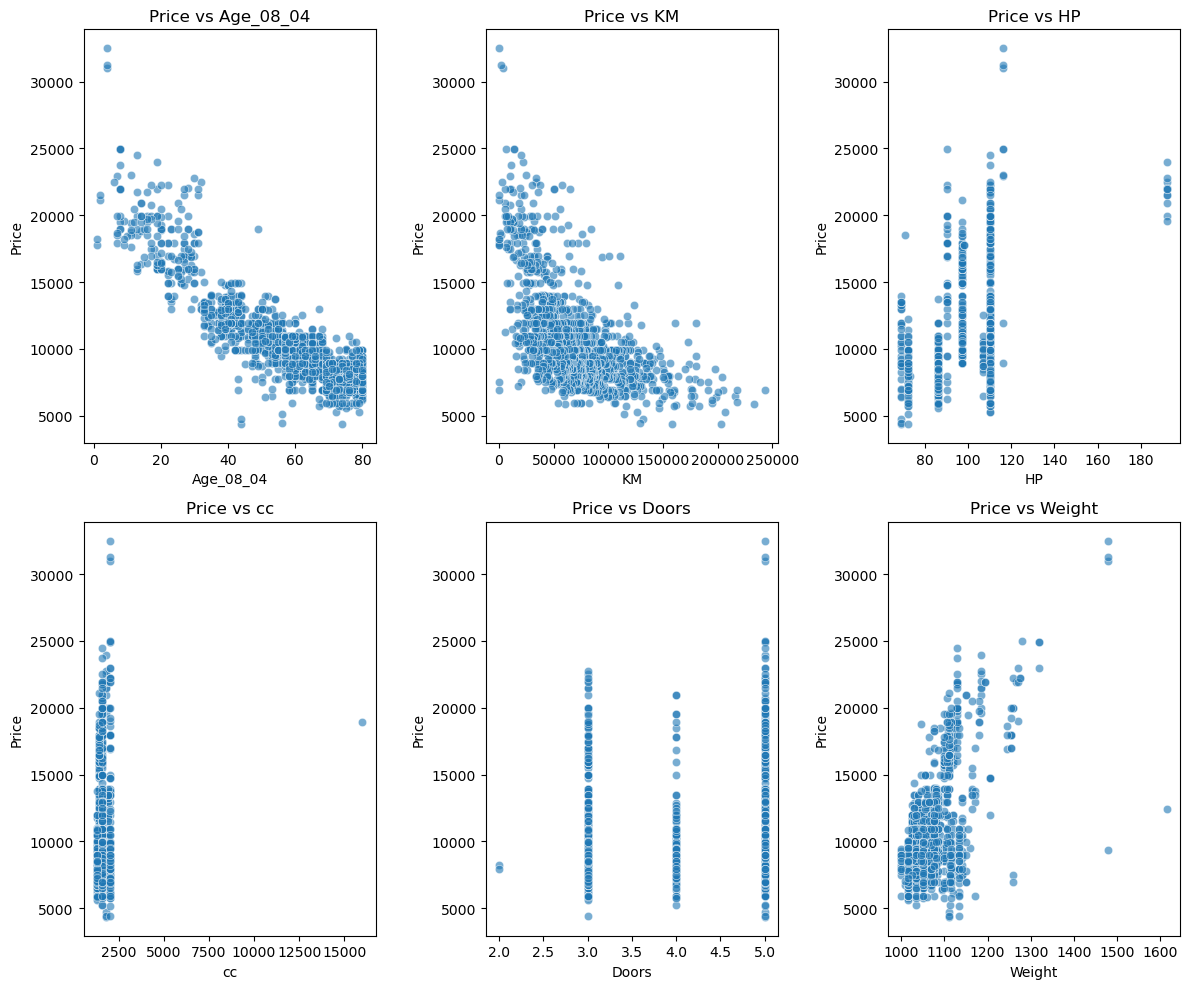

In [40]:
# Scatter plots to check linear relationships
plt.figure(figsize=(12, 10))
for idx, col in enumerate(num_cols):
    plt.subplot(2, 3, idx + 1)
    sns.scatterplot(data=df, x=col, y='Price', alpha=0.6)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

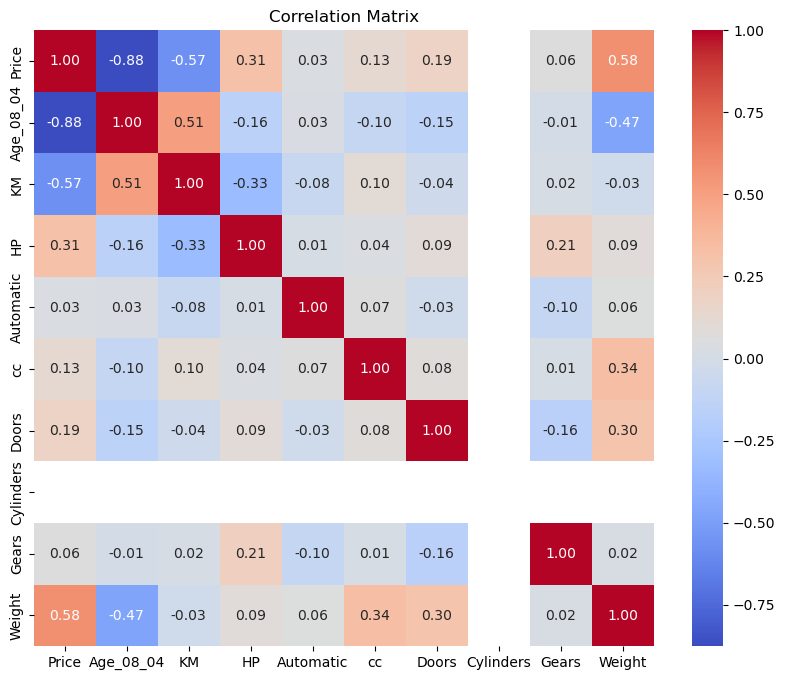

In [41]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [42]:
# Check Fuel_Type distribution
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


In [43]:
# 3. Preprocessing
# Remove outlier in 'cc'
df_cleaned = df[df['cc'] < 3000]

In [44]:
# One-hot encode Fuel_Type (drop_first=True avoids dummy trap)
df_encoded = pd.get_dummies(df_cleaned, columns=['Fuel_Type'], drop_first=True)

In [45]:
# Features and target
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [46]:
# 4. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 5. Build 3 MLR models
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [48]:
# Model 2: Drop 'Cylinders' (no variance)
X_train_model2 = X_train.drop(columns=['Cylinders'])
X_test_model2 = X_test.drop(columns=['Cylinders'])
model2 = LinearRegression()
model2.fit(X_train_model2, y_train)
y_pred2 = model2.predict(X_test_model2)

In [49]:
# Model 3: Drop 'Fuel_Type_Diesel' to see impact of categories
X_train_model3 = X_train.drop(columns=['Fuel_Type_Diesel'])
X_test_model3 = X_test.drop(columns=['Fuel_Type_Diesel'])
model3 = LinearRegression()
model3.fit(X_train_model3, y_train)
y_pred3 = model3.predict(X_test_model3)

In [50]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [51]:
metrics1 = evaluate_model(y_test, y_pred1)
metrics2 = evaluate_model(y_test, y_pred2)
metrics3 = evaluate_model(y_test, y_pred3)

In [52]:
# Display evaluation
model_results = pd.DataFrame({
    "Model": ["Model 1 (All Features)", "Model 2 (No Cylinders)", "Model 3 (No Fuel_Type_Diesel)"],
    "MSE": [metrics1[0], metrics2[0], metrics3[0]],
    "MAE": [metrics1[1], metrics2[1], metrics3[1]],
    "R2": [metrics1[2], metrics2[2], metrics3[2]]
})
print("\nModel Evaluation Results:\n", model_results)


Model Evaluation Results:
                            Model           MSE         MAE        R2
0         Model 1 (All Features)  2.038577e+06  949.202949  0.822581
1         Model 2 (No Cylinders)  2.038577e+06  949.202949  0.822581
2  Model 3 (No Fuel_Type_Diesel)  2.184519e+06  974.589194  0.809880


In [53]:
# 6. Interpret coefficients (Model 1)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model1.coef_
})
print("\nModel 1 Coefficients:\n", coef_df)


Model 1 Coefficients:
              Feature   Coefficient
0          Age_08_04 -1.189861e+02
1                 KM -1.542732e-02
2                 HP  4.672193e+01
3          Automatic  3.104631e+02
4                 cc -3.587580e+00
5              Doors -4.655151e+01
6          Cylinders  1.989520e-13
7              Gears  3.382147e+02
8             Weight  2.603735e+01
9   Fuel_Type_Diesel  1.964457e+03
10  Fuel_Type_Petrol  1.031455e+03


In [54]:
# 7. Apply Lasso and Ridge Regularization
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso, mae_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)

In [55]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge, mae_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)

In [56]:
# Display Lasso and Ridge results
regularization_results = pd.DataFrame({
    "Model": ["Lasso Regression", "Ridge Regression"],
    "MSE": [mse_lasso, mse_ridge],
    "MAE": [mae_lasso, mae_ridge],
    "R2": [r2_lasso, r2_ridge]
})
print("\nRegularization Results:\n", regularization_results)


Regularization Results:
               Model           MSE         MAE        R2
0  Lasso Regression  2.040252e+06  949.536083  0.822435
1  Ridge Regression  2.060619e+06  953.771088  0.820663


In [73]:
# Interview Questions
#Q1. What is Normalization & Standardization and how is it helpful?

#Normalization scales data to a range of [0, 1]. Useful when you don't assume any data distribution (e.g., MinMaxScaler).
#Standardization transforms data to have mean 0 and std 1. It’s useful when using models assuming Gaussian distribution (e.g., linear regression).
#Helps models converge faster and prevents features with larger scales from dominating the learning.

In [56]:
#Q2. What techniques can be used to address multicollinearity in MLR?

#Remove highly correlated predictors based on correlation matrix or VIF.
#Use dimensionality reduction like PCA.
#Regularization techniques like Ridge or Lasso (Ridge reduces variance; Lasso can remove variables entirely).
#Combine correlated variables (e.g., take their average).